# Hills and Valley Prediction wit Logistic Regression

## Objective
Predict weather a new datapoint provided will be a Hill or a Valley

## Data Source
YBI Foundation Githib repository

## Importing libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Importing Dataset

In [ ]:
df = pd.read_csv(r"https://github.com/YBIFoundation/Dataset/raw/main/Hill%20Valley%20Dataset.csv")

## Describe Data

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0


In [ ]:
df.shape

(1212, 101)

In [ ]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,8169.091881,8144.306262,8192.653738,8176.868738,8128.297211,8173.030008,8188.582748,8183.641543,8154.670066,8120.767574,...,8120.056815,8125.917409,8158.793812,8140.885421,8213.480611,8185.594002,8140.195355,8192.960891,8156.197376,0.500000
std,17974.950461,17881.049734,18087.938901,17991.903982,17846.757963,17927.114105,18029.562695,18048.582159,17982.390713,17900.798206,...,17773.190621,17758.182403,17919.510371,17817.945646,18016.445265,17956.084223,17768.356106,18064.781479,17829.310973,0.500206
min,0.920000,0.900000,0.850000,0.890000,0.880000,0.860000,0.870000,0.650000,0.650000,0.620000,...,0.870000,0.900000,0.870000,0.880000,0.890000,0.890000,0.860000,0.910000,0.890000,0.000000
25%,19.602500,19.595000,18.925000,19.277500,19.210000,19.582500,18.690000,19.062500,19.532500,19.285000,...,19.197500,18.895000,19.237500,19.385000,19.027500,19.135000,19.205000,18.812500,19.145000,0.000000
50%,301.425000,295.205000,297.260000,299.720000,295.115000,294.380000,295.935000,290.850000,294.565000,295.160000,...,297.845000,295.420000,299.155000,293.355000,301.370000,296.960000,300.925000,299.200000,302.275000,0.500000
75%,5358.795000,5417.847500,5393.367500,5388.482500,5321.987500,5328.040000,5443.977500,5283.655000,5378.180000,5319.097500,...,5355.355000,5386.037500,5286.385000,5345.797500,5300.890000,5361.047500,5390.850000,5288.712500,5357.847500,1.000000
max,117807.870000,108896.480000,119031.350000,110212.590000,113000.470000,116848.390000,115609.240000,118522.320000,112895.900000,117798.300000,...,113858.680000,112948.830000,112409.570000,112933.730000,112037.220000,115110.420000,116431.960000,113291.960000,114533.760000,1.000000


In [ ]:
df.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
...,...
V97,0
V98,0
V99,0
V100,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Columns: 101 entries, V1 to Class
dtypes: float64(100), int64(1)
memory usage: 956.5 KB


In [ ]:
df['Class'].value_counts()

,count
Class,
0,606
1,606


In [ ]:
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
Class,,,,,,,,,,,,,,,,,,,,,
0,7913.333251,7825.339967,7902.497294,7857.032079,7775.610198,7875.436337,7804.166584,7722.324802,7793.328416,7686.782046,...,7753.427244,7737.843366,7799.332079,7825.211700,7791.354010,7927.237112,7874.502343,7844.227459,7875.338713,7855.181172
1,8424.850512,8463.272558,8482.810182,8496.705396,8480.984224,8470.623680,8572.998911,8644.958284,8516.011716,8554.753102,...,8478.513399,8502.270264,8452.502739,8492.375924,8490.416832,8499.724109,8496.685660,8436.163251,8510.583069,8457.213581


In [ ]:
cols = df.drop('Class', axis=1)

arr = []
for i in cols:
  val = np.cov(df['Class'], df[i])
  arr.append(val)

arr

[array([[2.50206441e-01, 1.27984913e+02],
        [1.27984913e+02, 3.23098844e+08]]),
 array([[2.50206441e-01, 1.59614843e+02],
        [1.59614843e+02, 3.19731940e+08]]),
 array([[2.50206441e-01, 1.45198022e+02],
        [1.45198022e+02, 3.27173534e+08]]),
 array([[2.50206441e-01, 1.60050384e+02],
        [1.60050384e+02, 3.23708609e+08]]),
 array([[2.50206441e-01, 1.76489125e+02],
        [1.76489125e+02, 3.18506770e+08]]),
 array([[2.50206441e-01, 1.48919707e+02],
        [1.48919707e+02, 3.21381420e+08]]),
 array([[2.50206441e-01, 1.92366800e+02],
        [1.92366800e+02, 3.25065131e+08]]),
 array([[2.50206441e-01, 2.30848840e+02],
        [2.30848840e+02, 3.25751318e+08]]),
 array([[2.50206441e-01, 1.80820017e+02],
        [1.80820017e+02, 3.23366376e+08]]),
 array([[2.50206441e-01, 2.17171949e+02],
        [2.17171949e+02, 3.20438576e+08]]),
 array([[2.50206441e-01, 2.36286685e+02],
        [2.36286685e+02, 3.28232728e+08]]),
 array([[2.50206441e-01, 2.43150318e+02],
        [2.4

In [ ]:
np.cov(df['Class'], df['V1'])

array([[2.50206441e-01, 1.27984913e+02],
       [1.27984913e+02, 3.23098844e+08]])

## Data Visualization

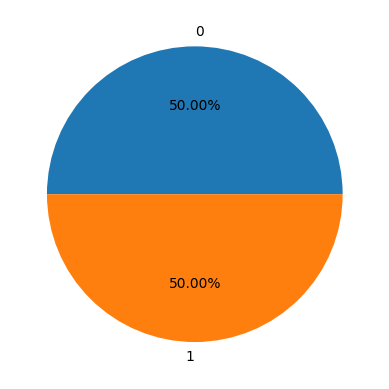

In [ ]:
plt.pie(df['Class'].value_counts(), labels=df['Class'].unique(), autopct='%1.2f%%')

plt.show()

## Define Target Variable (y) and Feature Variables (X)

In [ ]:
X = df.iloc[:, 1:-1]
y = df['Class']

In [ ]:
X.shape

(1212, 99)

In [ ]:
y.shape

(1212,)

## Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((848, 99), (364, 99), (848,), (364,))

## Modeling

In [ ]:
lr = LogisticRegression(max_iter=100)
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, accuracy_score

In [ ]:
confusion_matrix(y_test, lr.predict(x_test))

array([[163,  13],
       [  8, 180]])

In [ ]:
report = classification_report(y_test, lr.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       176
           1       0.93      0.96      0.94       188

    accuracy                           0.94       364
   macro avg       0.94      0.94      0.94       364
weighted avg       0.94      0.94      0.94       364



In [ ]:
precision_recall_curve(y_test, lr.predict(x_test))

(array([0.51648352, 0.93264249, 1.        ]),
 array([1.        , 0.95744681, 0.        ]),
 array([0, 1]))

In [ ]:
roc_curve(y_test, lr.predict(x_test))

(array([0.        , 0.07386364, 1.        ]),
 array([0.        , 0.95744681, 1.        ]),
 array([inf,  1.,  0.]))

In [ ]:
accuracy_score(y_test, lr.predict(x_test)) * 100

94.23076923076923

## Prediction

In [ ]:
def predicition(input):
  input = np.array(input).reshape(1, -1)
  return lr.predict(input)[0]

In [ ]:
predicition(x_test.iloc[40, :])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0

In [ ]:
y_test.iloc[40]

0